In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:

test = pd.read_csv("C:/Users/Akash Sagar/Downloads/CAPTCHA_images/test_labels.csv")

In [3]:
test.head()

,image_id,width,height,class,xmin,ymin,xmax,ymax
0,0171.jpg,546,144,J,43,40,97,130
1,0171.jpg,546,144,J,150,45,240,102
2,0171.jpg,546,144,K,279,11,365,89
3,0171.jpg,546,144,Q,380,29,457,122
4,0171.jpg,546,144,D,467,67,532,131


In [13]:
def creatingPath(x):
    return ("C:/Users/Akash Sagar/Downloads/CAPTCHA_images/test/"+x+"")

test["path"] = test["image_id"].apply(creatingPath)

In [20]:
import numpy as np
import cv2

def plot_bbox(img_id):
  img_url = test.loc[test["image_id"]==img_id]['path'].values[0]
  img = cv2.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = test[test['image_id']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['xmin']
      xmax = row['xmax']
      ymin = row['ymin']
      ymax = row['ymax']
      #xmin = int(xmin*width)
      #xmax = int(xmax*width)
      #ymin = int(ymin*height)
      #ymax = int(ymax*height)
      label_name = row['class']
      class_series = test[test["class"]==label_name]
      class_name = class_series["class"].values[0]
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, class_name, (xmin,ymin-10), font, 1, (0,255,0), 5)
  plt.figure(figsize=(10,5))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Image: (24, 91, 3)
Coordinates: (14, 2), (21, 15)
Coordinates: (22, 3), (33, 17)
Coordinates: (33, 1), (45, 14)
Coordinates: (62, 8), (73, 19)
Coordinates: (77, 7), (87, 18)


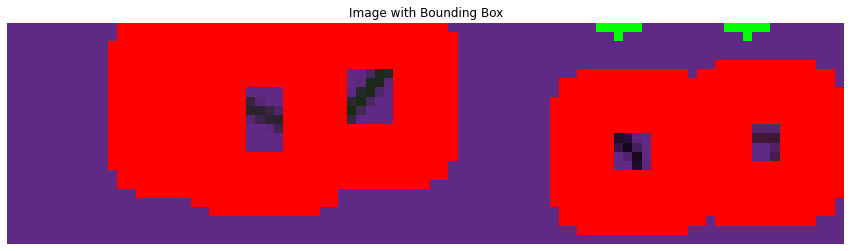

Image: (144, 546, 3)
Coordinates: (58, 41), (163, 126)
Coordinates: (211, 46), (305, 125)
Coordinates: (316, 67), (391, 140)
Coordinates: (396, 61), (474, 136)
Coordinates: (476, 1), (540, 61)


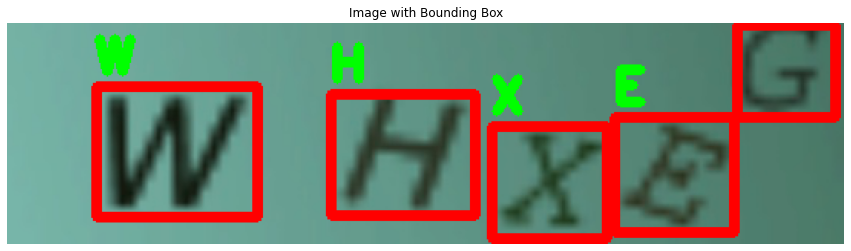

Image: (100, 400, 3)
Coordinates: (96, 14), (141, 73)
Coordinates: (151, 27), (192, 86)
Coordinates: (202, 5), (243, 65)
Coordinates: (251, 17), (291, 78)


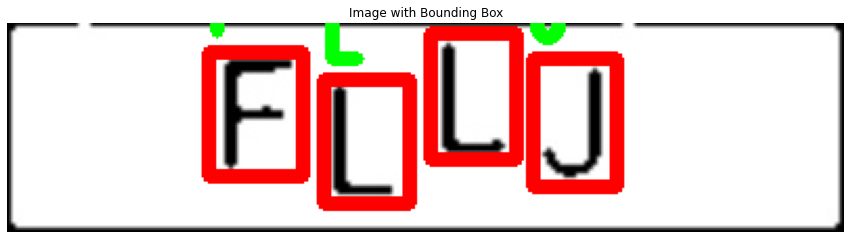

Image: (100, 400, 3)
Coordinates: (102, 1), (145, 61)
Coordinates: (154, 25), (190, 85)
Coordinates: (203, 1), (244, 55)
Coordinates: (256, 3), (288, 60)


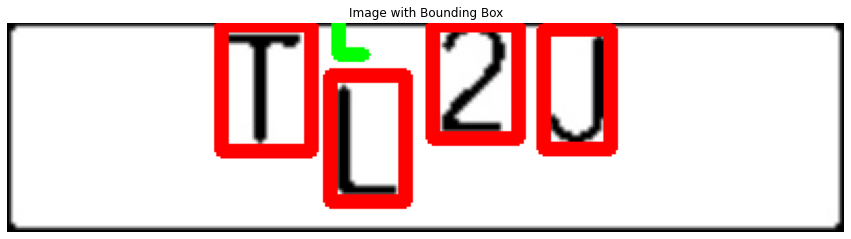

Image: (100, 400, 3)
Coordinates: (143, 21), (188, 80)
Coordinates: (196, 8), (245, 66)
Coordinates: (250, 36), (299, 99)
Coordinates: (304, 37), (349, 98)


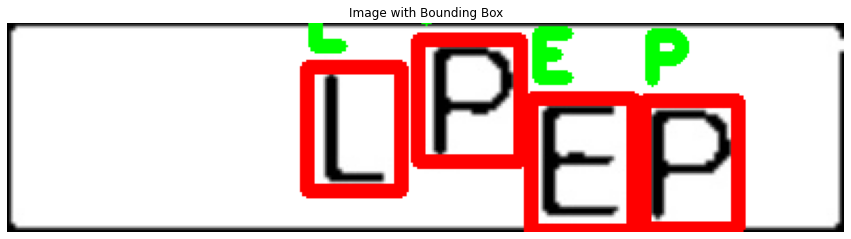

In [21]:
least_objects_img_ids = test["image_id"].value_counts().tail(50).index.values
for img_id in random.sample(list(least_objects_img_ids), 5):
  plot_bbox(img_id)

In [ ]:
test["class"].value_counts()

J    26
K    25
P    23
L    22
Y    20
X    20
A    19
H    19
Z    19
C    18
W    18
E    18
S    15
O    14
V    13
G    11
R    11
I    10
U     9
N     9
B     9
4     8
F     8
Q     8
T     8
M     7
D     7
6     4
2     4
5     2
3     1
Name: class, dtype: int64

In [ ]:
test_df = test[int(test.shape[0]*0.9):]

# for test
with open("test_annotation.txt", "w+") as f:
  for idx, row in test_df.iterrows():
      sys.stdout.write(str(idx) + '\r')
      sys.stdout.flush()
      img = cv2.imread(row['path'])
      height, width = img.shape[:2]
      x1 = int(row['xmin'])
      x2 = int(row['xmax'])
      y1 = int(row['ymin'])
      y2 = int(row['ymax'])
      
      #google_colab_file_path = 'drive/My Drive/AI/Dataset/Open Images Dataset v4 (Bounding Boxes)/test'
      fileName = row['path']
      className = row['class']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')